In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

gen_results = np.load('/Users/isaaclee/Wildfire_Research/generated_mean_std.npz')
gen_samples = np.load('/Users/isaaclee/Wildfire_Research/generated_samples.npz')
real_samples = np.load('/Users/isaaclee/Wildfire_Research/real_samples.npz')
conditional_inputs = np.load('/Users/isaaclee/Wildfire_Research/conditional_inputs.npz')
training_testing_data = np.load('/Users/isaaclee/Wildfire_Research/training_testing_data_for_predicting_fire_area_from_ign_time_conditions.npy')
training_data = training_testing_data[-1200:]

print(gen_results.files)
print(gen_samples.files)
print(real_samples.files)
print(conditional_inputs.files)
print(training_testing_data.shape)
print(training_data.shape)


['array1', 'array2']
['arr_0']
['arr_0']
['arr_0']
(15200, 24)
(1200, 24)


# Evaluating model accuracy

In [4]:
# Calculating Mean Absolute Error
real = real_samples['arr_0']
pred = gen_results['array1']
print(real.shape)
print(pred.shape)

stds = gen_results['array2']

print(pred.shape)
print(stds.shape)

mae = np.mean(np.abs(real-pred))
print("Mean Absolute Error: " + str(mae))

normalized_mae = mae/np.mean(real)
print(normalized_mae)

(1200, 1)
(1200, 1)
(1200, 1)
(1200, 1)
Mean Absolute Error: 0.04053448680583339
0.6376121515996404


(1200000,)
(1200,)


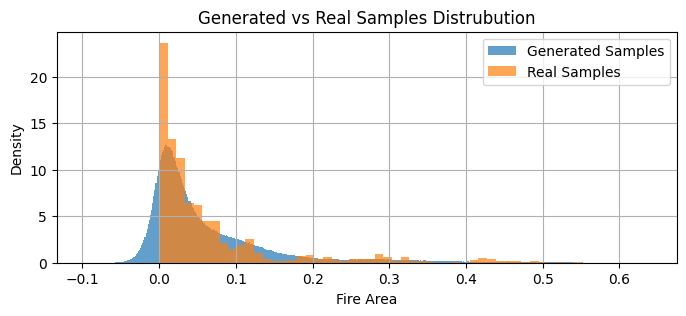

In [5]:
gen = gen_samples['arr_0'].flatten()
real = real_samples['arr_0'].flatten()

print(gen.shape)
print(real.shape)

plt.figure(figsize=(8,3))
plt.title('Generated vs Real Samples Distrubution')
plt.hist(gen, bins='auto', alpha=0.7, label='Generated Samples', density=True)
plt.hist(real, bins='auto', alpha=0.7, label='Real Samples', density=True)
plt.legend()
plt.xlabel('Fire Area')
plt.ylabel('Density')
plt.grid(True)
plt.show()

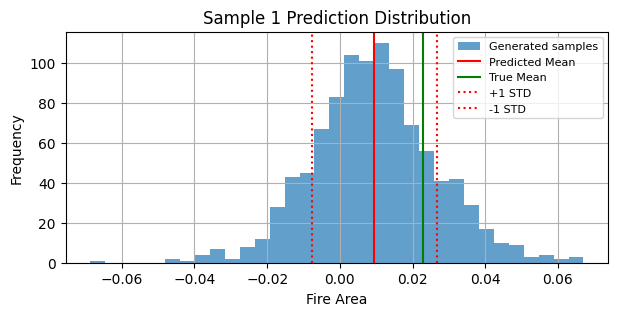

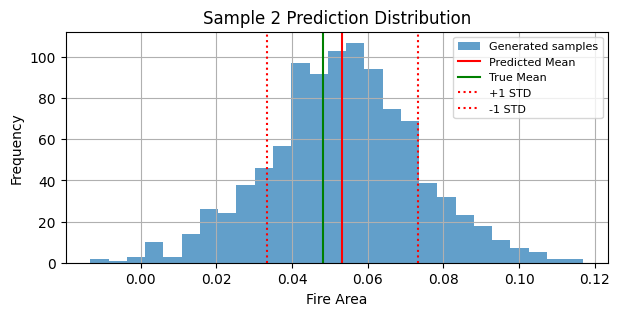

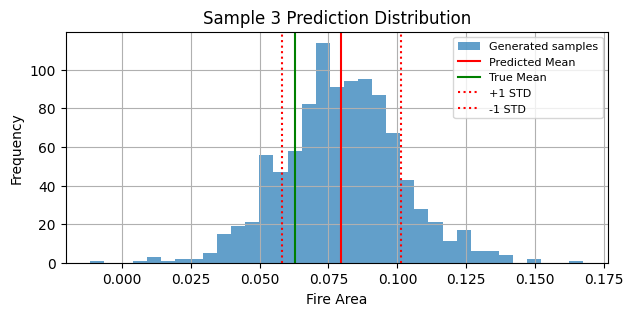

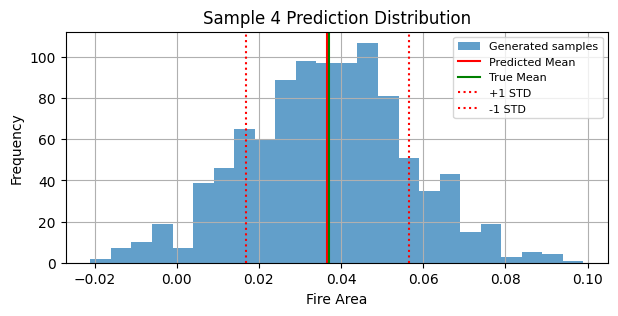

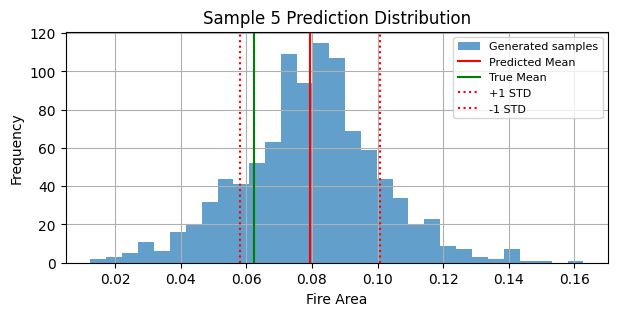

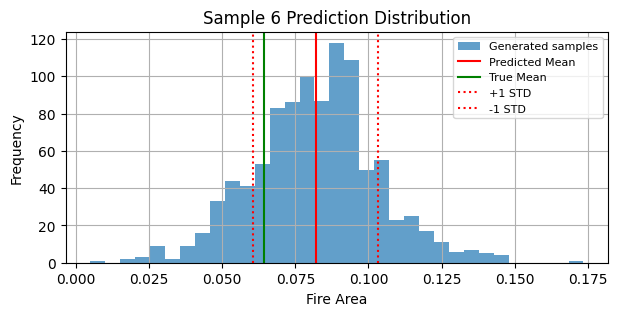

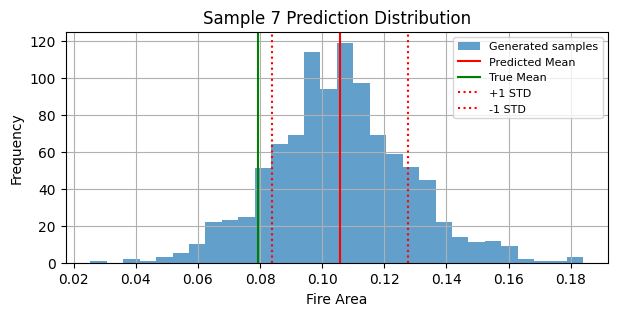

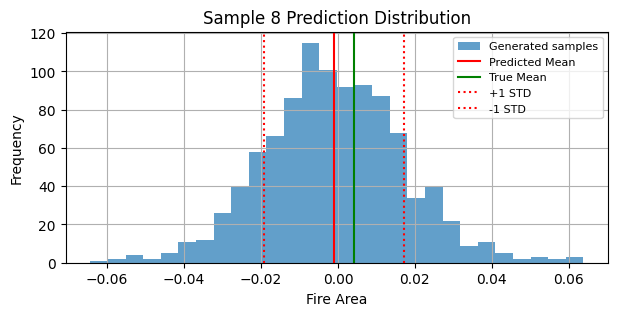

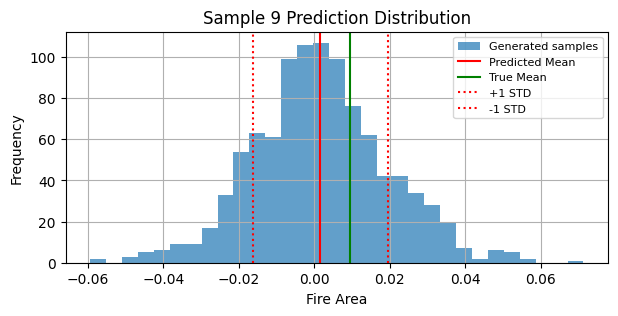

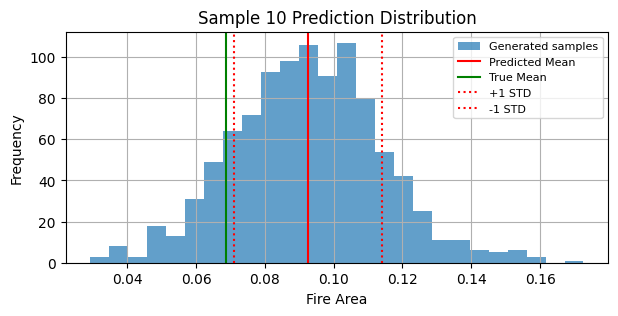

In [6]:
gen_all = gen_samples['arr_0'].reshape(1200, 1000)
means = gen_results['array1']
stds = gen_results['array2']
real = real_samples['arr_0']

for i in range(10): 
    plt.figure(figsize=(7,3))
    plt.title('Sample ' + str(i+1) + ' Prediction Distribution')
    plt.hist(gen_all[i], bins='auto', alpha=0.7, label='Generated samples') 
    plt.xlabel('Fire Area')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.axvline(means[i], color='red', label='Predicted Mean')
    plt.axvline(real[i], color='green', label='True Mean')
    plt.axvline(means[i]+stds[i], color='red', label='+1 STD', linestyle=':')
    plt.axvline(means[i]-stds[i], color='red', label='-1 STD', linestyle=':')
    plt.legend(fontsize='8')
    plt.show()


# graph with different forecast lengths
# include forecast length in title

# include number of times it is within 1 std

# Forecast Length on Model Accuracy

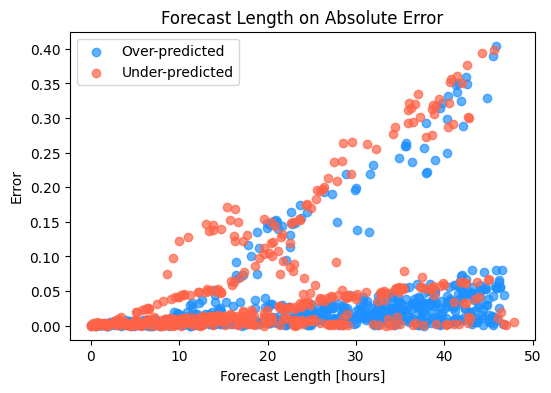

In [7]:
real = real_samples['arr_0']
abs_error = np.abs(real-pred)
forecast_len = training_data[:,1]
error_columns = ['forecast_len', 'error']
error_data = pd.DataFrame(np.column_stack((forecast_len*50, abs_error)),columns=error_columns)

over = np.where(pred >real)[0]
under = np.where(pred < real)[0]

plt.figure(figsize=(6,4))
plt.scatter(error_data['forecast_len'][over], error_data['error'][over], color='dodgerblue', label='Over-predicted', alpha=0.7)
plt.scatter(error_data['forecast_len'][under], error_data['error'][under], color='tomato', label='Under-predicted', alpha=0.7)
plt.title('Forecast Length on Absolute Error')
plt.xlabel('Forecast Length [hours]')
plt.ylabel('Error')
plt.legend()
plt.show()

(1200, 1)
(1200, 1)
1.3471307054601118


Text(0, 0.5, 'Percent Error [%]')

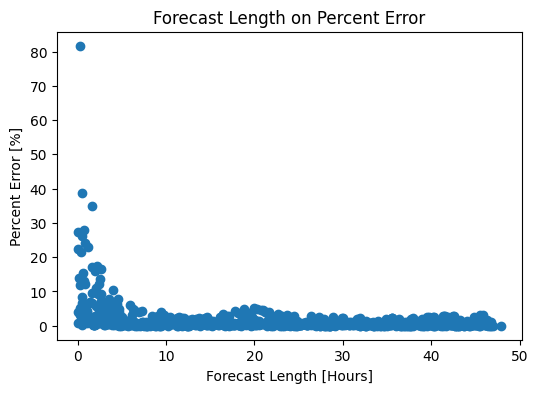

In [8]:
print(abs_error.shape)
print(real.shape)

normalized_abs_error = abs_error / np.abs(real)
print(np.mean(normalized_abs_error))
error_columns = ['forecast_len', 'normalized_error']
normalized_error_data = pd.DataFrame(np.column_stack((forecast_len*50, normalized_abs_error)),columns=error_columns)

plt.figure(figsize=(6,4))
plt.scatter(normalized_error_data['forecast_len'], normalized_error_data['normalized_error'])
plt.title('Forecast Length on Percent Error')
plt.xlabel('Forecast Length [Hours]')
plt.ylabel('Percent Error [%]')

## Analyzing outliers

In [9]:
threshold = 20
outlier_indices = np.where(normalized_error_data['normalized_error'] >= threshold)[0]
print(outlier_indices.size)

col_names = ["fire_area", "forecast_len", "u", "v", "humidity", "temp", "terrain_x", "terrain_y", "terrain_var", "terrain_RMS", "fuel1", "fuel2", "fuel3", "fuel4", "fuel5", "fuel6", "fuel7", "fuel8", "fuel9", "fuel10", "fuel11", "fuel12","fuel13", "fuel14"]
outlier_data = pd.DataFrame(training_data[outlier_indices], columns=col_names)

non_outlier_indices = np.where(normalized_error_data['normalized_error'] < threshold)[0]
print(non_outlier_indices.size)
non_outlier_data = pd.DataFrame(training_data[non_outlier_indices], columns=col_names)

print(forecast_len[outlier_indices])

10
1190
[0.03191554 0.00160575 0.00092478 0.02437082 0.01609795 0.01501512
 0.00727785 0.00515958 0.01069939 0.01057911]


In [10]:
print("Outlier mean forecast_len: ", outlier_data['forecast_len'].mean()*50)
print("Non-outlier mean forecast_len: ", non_outlier_data['forecast_len'].mean()*50)
print()
print("Outlier mean humidity: ", outlier_data['humidity'].mean())
print("Non-outlier mean humidity: ", non_outlier_data['humidity'].mean())
print()
print("Outlier mean temp: ", outlier_data['temp'].mean())
print("Non-outlier mean temp: ", non_outlier_data['temp'].mean())
print()
print("Outlier mean fuel7: ", outlier_data['fuel7'].mean())
print("Non-outlier mean fuel7: ", non_outlier_data['fuel7'].mean())


Outlier mean forecast_len:  0.6182294042082503
Non-outlier mean forecast_len:  23.08583030453198

Outlier mean humidity:  0.2844176709651947
Non-outlier mean humidity:  0.31874055831121795

Outlier mean temp:  0.642409372329712
Non-outlier mean temp:  0.626063296875032

Outlier mean fuel7:  0.00015484374706602465
Non-outlier mean fuel7:  0.0012827717851606592


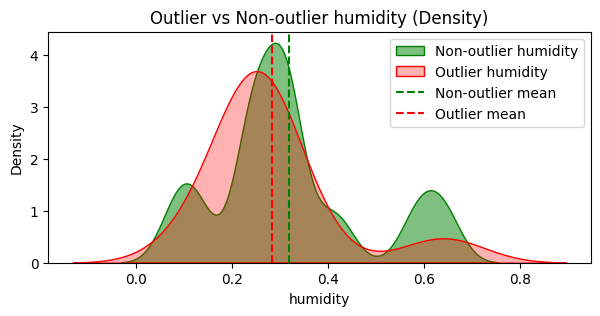

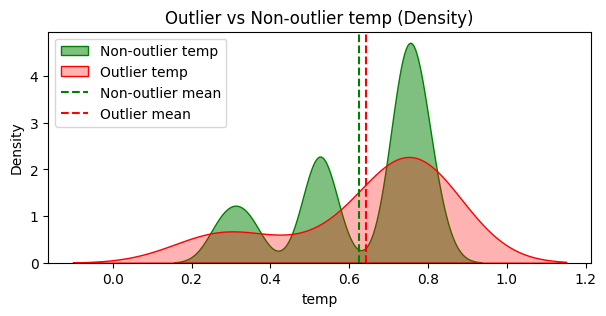

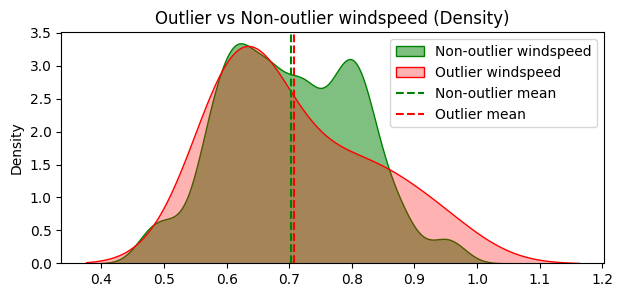

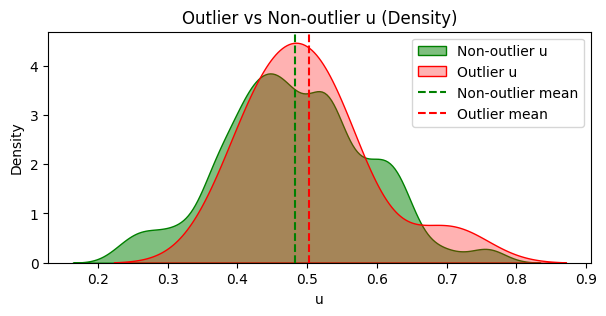

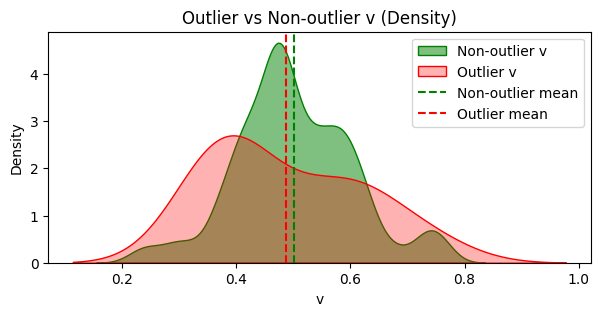

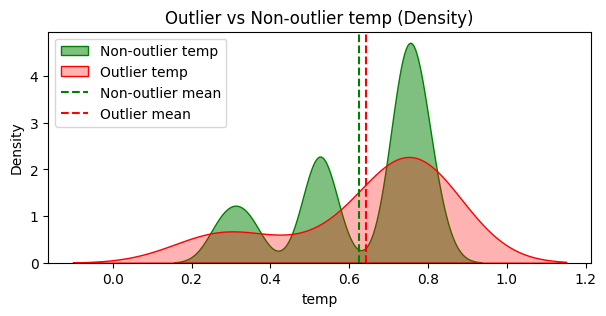

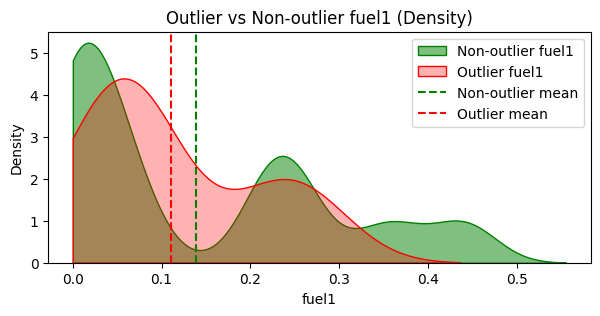

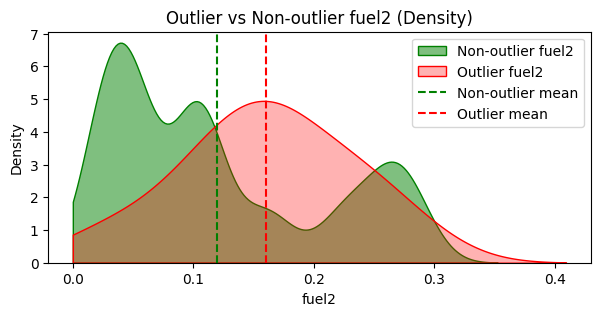

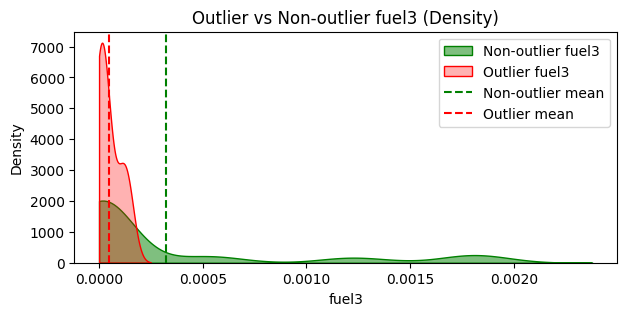

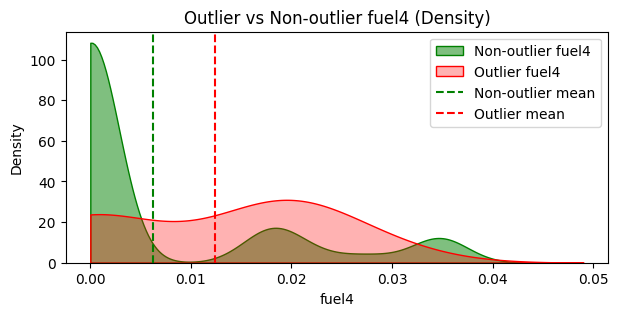

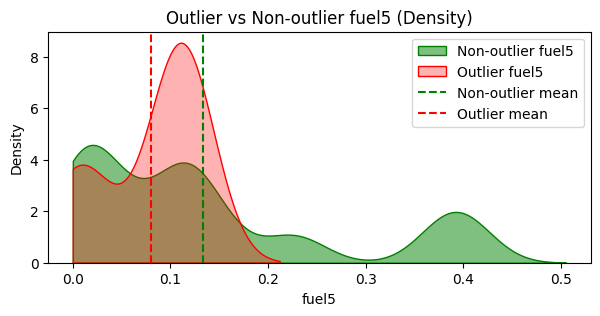

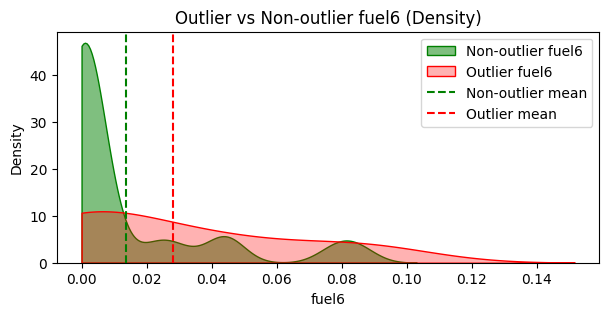

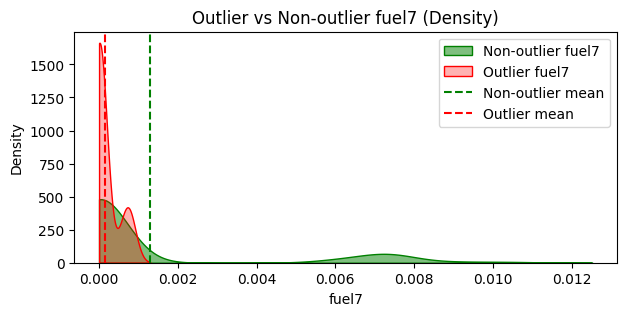

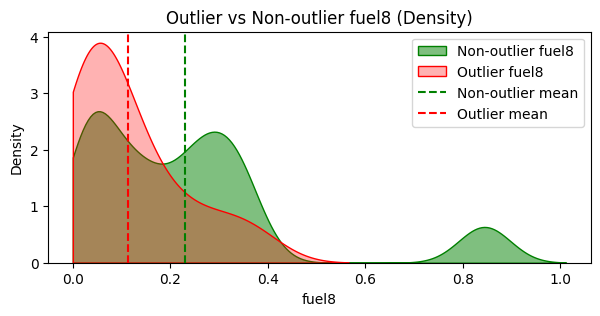

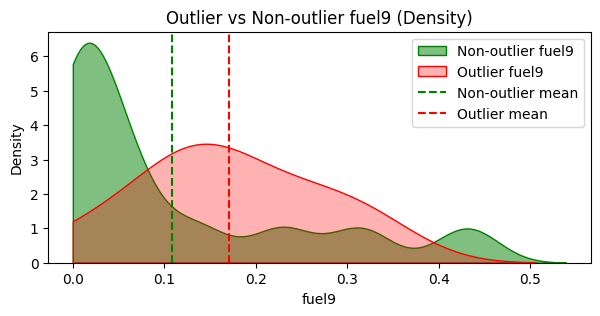

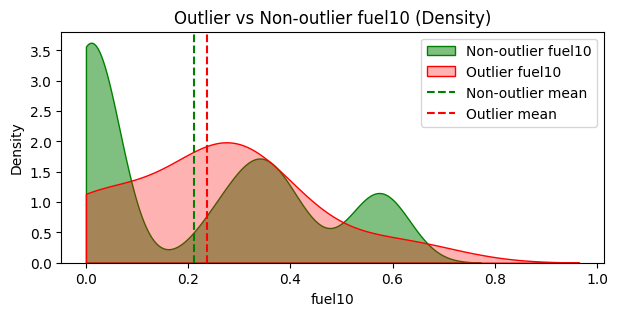

/var/folders/xq/8_lvf7nn62dfrfrb5mr1w67w0000gn/T/ipykernel_73092/527468142.py:144: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(non_outlier_data['fuel11'], fill=True, alpha=0.5, label='Non-outlier fuel11', color='green', clip=(0, None))
/var/folders/xq/8_lvf7nn62dfrfrb5mr1w67w0000gn/T/ipykernel_73092/527468142.py:145: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(outlier_data['fuel11'], fill=True, alpha=0.3, label='Outlier fuel11', color='red', clip=(0, None))


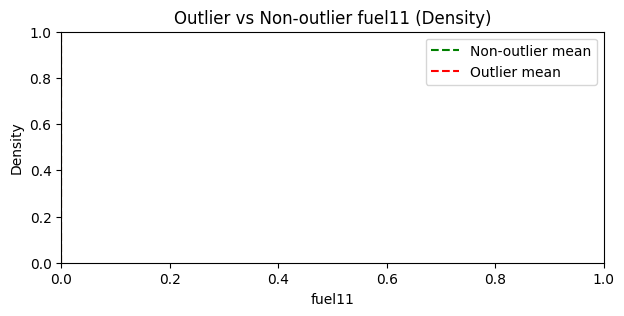

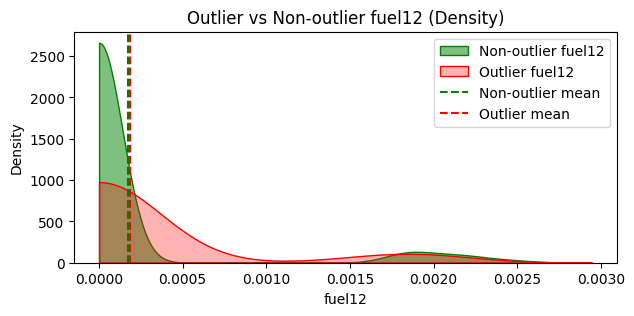

/var/folders/xq/8_lvf7nn62dfrfrb5mr1w67w0000gn/T/ipykernel_73092/527468142.py:160: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(non_outlier_data['fuel13'], fill=True, alpha=0.5, label='Non-outlier fuel13', color='green', clip=(0, None))
/var/folders/xq/8_lvf7nn62dfrfrb5mr1w67w0000gn/T/ipykernel_73092/527468142.py:161: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(outlier_data['fuel13'], fill=True, alpha=0.3, label='Outlier fuel13', color='red', clip=(0, None))


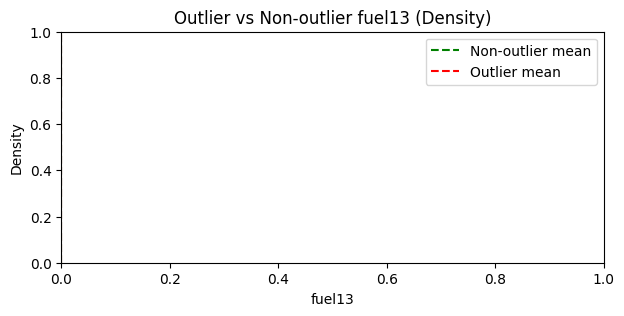

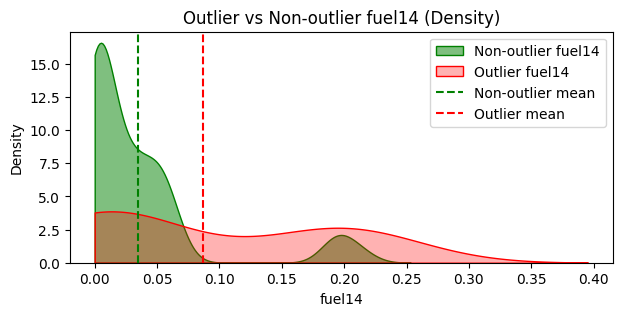

In [11]:
import seaborn as sns

plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['humidity'], fill=True, alpha=0.5, label='Non-outlier humidity', color='green')
sns.kdeplot(outlier_data['humidity'], fill=True, alpha=0.3, label='Outlier humidity', color='red')
plt.axvline(non_outlier_data['humidity'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['humidity'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier humidity (Density)')
plt.legend()
plt.show()

plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['temp'], fill=True, alpha=0.5, label='Non-outlier temp', color='green')
sns.kdeplot(outlier_data['temp'], fill=True, alpha=0.3, label='Outlier temp', color='red')
plt.axvline(non_outlier_data['temp'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['temp'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier temp (Density)')
plt.legend()
plt.show()

non_outlier_u = non_outlier_data['u']
non_outlier_v = non_outlier_data['v']
non_outlier_windspeed = np.sqrt(non_outlier_u**2 + non_outlier_v**2)
outlier_u = outlier_data['u']
outlier_v = outlier_data['v']
outlier_windspeed = np.sqrt(outlier_u**2 + outlier_v**2)
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_windspeed, fill=True, alpha=0.5, label='Non-outlier windspeed', color='green')
sns.kdeplot(outlier_windspeed, fill=True, alpha=0.3, label='Outlier windspeed', color='red')
plt.axvline(non_outlier_windspeed.mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_windspeed.mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier windspeed (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_u, fill=True, alpha=0.5, label='Non-outlier u', color='green')
sns.kdeplot(outlier_u, fill=True, alpha=0.3, label='Outlier u', color='red')
plt.axvline(non_outlier_u.mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_u.mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier u (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_v, fill=True, alpha=0.5, label='Non-outlier v', color='green')
sns.kdeplot(outlier_v, fill=True, alpha=0.3, label='Outlier v', color='red')
plt.axvline(non_outlier_v.mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_v.mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier v (Density)')
plt.legend()
plt.show()

plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['temp'], fill=True, alpha=0.5, label='Non-outlier temp', color='green')
sns.kdeplot(outlier_data['temp'], fill=True, alpha=0.3, label='Outlier temp', color='red')
plt.axvline(non_outlier_data['temp'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['temp'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier temp (Density)')
plt.legend()
plt.show()

# fuel 1, 4, 5, 7

plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['fuel1'], fill=True, alpha=0.5, label='Non-outlier fuel1', color='green', clip=(0, None))
sns.kdeplot(outlier_data['fuel1'], fill=True, alpha=0.3, label='Outlier fuel1', color='red', clip=(0, None))
plt.axvline(non_outlier_data['fuel1'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['fuel1'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier fuel1 (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['fuel2'], fill=True, alpha=0.5, label='Non-outlier fuel2', color='green', clip=(0, None))
sns.kdeplot(outlier_data['fuel2'], fill=True, alpha=0.3, label='Outlier fuel2', color='red', clip=(0, None))
plt.axvline(non_outlier_data['fuel2'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['fuel2'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier fuel2 (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['fuel3'], fill=True, alpha=0.5, label='Non-outlier fuel3', color='green', clip=(0, None))
sns.kdeplot(outlier_data['fuel3'], fill=True, alpha=0.3, label='Outlier fuel3', color='red', clip=(0, None))
plt.axvline(non_outlier_data['fuel3'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['fuel3'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier fuel3 (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['fuel4'], fill=True, alpha=0.5, label='Non-outlier fuel4', color='green', clip=(0, None))
sns.kdeplot(outlier_data['fuel4'], fill=True, alpha=0.3, label='Outlier fuel4', color='red', clip=(0, None))
plt.axvline(non_outlier_data['fuel4'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['fuel4'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier fuel4 (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['fuel5'], fill=True, alpha=0.5, label='Non-outlier fuel5', color='green', clip=(0, None))
sns.kdeplot(outlier_data['fuel5'], fill=True, alpha=0.3, label='Outlier fuel5', color='red', clip=(0, None))
plt.axvline(non_outlier_data['fuel5'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['fuel5'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier fuel5 (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['fuel6'], fill=True, alpha=0.5, label='Non-outlier fuel6', color='green', clip=(0, None))
sns.kdeplot(outlier_data['fuel6'], fill=True, alpha=0.3, label='Outlier fuel6', color='red', clip=(0, None))
plt.axvline(non_outlier_data['fuel6'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['fuel6'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier fuel6 (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['fuel7'], fill=True, alpha=0.5, label='Non-outlier fuel7', color='green', clip=(0, None))
sns.kdeplot(outlier_data['fuel7'], fill=True, alpha=0.3, label='Outlier fuel7', color='red', clip=(0, None))
plt.axvline(non_outlier_data['fuel7'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['fuel7'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier fuel7 (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['fuel8'], fill=True, alpha=0.5, label='Non-outlier fuel8', color='green', clip=(0, None))
sns.kdeplot(outlier_data['fuel8'], fill=True, alpha=0.3, label='Outlier fuel8', color='red', clip=(0, None))
plt.axvline(non_outlier_data['fuel8'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['fuel8'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier fuel8 (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['fuel9'], fill=True, alpha=0.5, label='Non-outlier fuel9', color='green', clip=(0, None))
sns.kdeplot(outlier_data['fuel9'], fill=True, alpha=0.3, label='Outlier fuel9', color='red', clip=(0, None))
plt.axvline(non_outlier_data['fuel9'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['fuel9'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier fuel9 (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['fuel10'], fill=True, alpha=0.5, label='Non-outlier fuel10', color='green', clip=(0, None))
sns.kdeplot(outlier_data['fuel10'], fill=True, alpha=0.3, label='Outlier fuel10', color='red', clip=(0, None))
plt.axvline(non_outlier_data['fuel10'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['fuel10'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier fuel10 (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['fuel11'], fill=True, alpha=0.5, label='Non-outlier fuel11', color='green', clip=(0, None))
sns.kdeplot(outlier_data['fuel11'], fill=True, alpha=0.3, label='Outlier fuel11', color='red', clip=(0, None))
plt.axvline(non_outlier_data['fuel11'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['fuel11'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier fuel11 (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['fuel12'], fill=True, alpha=0.5, label='Non-outlier fuel12', color='green', clip=(0, None))
sns.kdeplot(outlier_data['fuel12'], fill=True, alpha=0.3, label='Outlier fuel12', color='red', clip=(0, None))
plt.axvline(non_outlier_data['fuel12'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['fuel12'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier fuel12 (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['fuel13'], fill=True, alpha=0.5, label='Non-outlier fuel13', color='green', clip=(0, None))
sns.kdeplot(outlier_data['fuel13'], fill=True, alpha=0.3, label='Outlier fuel13', color='red', clip=(0, None))
plt.axvline(non_outlier_data['fuel13'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['fuel13'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier fuel13 (Density)')
plt.legend()
plt.show()
plt.figure(figsize=(7,3))
sns.kdeplot(non_outlier_data['fuel14'], fill=True, alpha=0.5, label='Non-outlier fuel14', color='green', clip=(0, None))
sns.kdeplot(outlier_data['fuel14'], fill=True, alpha=0.3, label='Outlier fuel14', color='red', clip=(0, None))
plt.axvline(non_outlier_data['fuel14'].mean(), color='green', linestyle='--', label='Non-outlier mean')
plt.axvline(outlier_data['fuel14'].mean(), color='red', linestyle='--', label='Outlier mean')
plt.title('Outlier vs Non-outlier fuel14 (Density)')
plt.legend()
plt.show()

In [12]:
# Negative fuel?

col_names = ["fire_area", "forecast_len", "u", "v", "humidity", "temp", "terrain_x", "terrain_y", "terrain_var", "terrain_RMS", "fuel1", "fuel2", "fuel3", "fuel4", "fuel5", "fuel6", "fuel7", "fuel8", "fuel9", "fuel10", "fuel11", "fuel12","fuel13", "fuel14"]
df = pd.DataFrame(training_data, columns=col_names)
fuel_df = df[['fuel1', 'fuel2', 'fuel3', 'fuel4', 'fuel5', 'fuel6', 'fuel7', 'fuel8', 'fuel9', 'fuel10', 'fuel11', 'fuel12', 'fuel13', 'fuel14']]

print((fuel_df < 0).sum())

fuel1     0
fuel2     0
fuel3     0
fuel4     0
fuel5     0
fuel6     0
fuel7     0
fuel8     0
fuel9     0
fuel10    0
fuel11    0
fuel12    0
fuel13    0
fuel14    0
dtype: int64


# Filtering by forecast length, looking at correlations

In [13]:
print(training_data.shape)

time = 36/50
tol = 2/50
indices = np.where(np.abs(training_data[:, 1] - time) <= tol)[0]
filtered_training_data = training_data[indices]
print(filtered_training_data.shape)

col_names = ["fire_area", "forecast_len", "u", "v", "humidity", "temp", "terrain_x", "terrain_y", "terrain_var", "terrain_RMS", "fuel1", "fuel2", "fuel3", "fuel4", "fuel5", "fuel6", "fuel7", "fuel8", "fuel9", "fuel10", "fuel11", "fuel12","fuel13", "fuel14"]
df = pd.DataFrame(filtered_training_data, columns=col_names)
df.tail()

(1200, 24)
(123, 24)


,fire_area,forecast_len,u,v,humidity,temp,terrain_x,terrain_y,terrain_var,terrain_RMS,...,fuel5,fuel6,fuel7,fuel8,fuel9,fuel10,fuel11,fuel12,fuel13,fuel14
118,0.058660,0.752186,0.524656,0.389223,0.244099,0.765256,0.640331,0.489735,0.358143,0.314007,...,0.116472,0.000106,0.000003,0.034448,0.134308,0.263641,0.0,0.0,0.0,0.193748
119,0.060034,0.758428,0.387319,0.510061,0.244010,0.766426,0.414915,0.619805,0.323157,0.269441,...,0.116864,0.000128,0.000019,0.043303,0.136009,0.247511,0.0,0.0,0.0,0.195777
120,0.049684,0.697543,0.387319,0.510061,0.244010,0.766426,0.414915,0.619805,0.323157,0.269441,...,0.116864,0.000128,0.000019,0.043303,0.136009,0.247511,0.0,0.0,0.0,0.195777
121,0.054138,0.727123,0.389781,0.472753,0.244093,0.765211,0.517640,0.634565,0.365913,0.314193,...,0.116500,0.000105,0.000005,0.033736,0.134697,0.264720,0.0,0.0,0.0,0.193780
122,0.049647,0.697390,0.417468,0.422929,0.243333,0.767553,0.540910,0.618964,0.331923,0.268476,...,0.117511,0.000175,0.000002,0.031445,0.140178,0.257734,0.0,0.0,0.0,0.208270


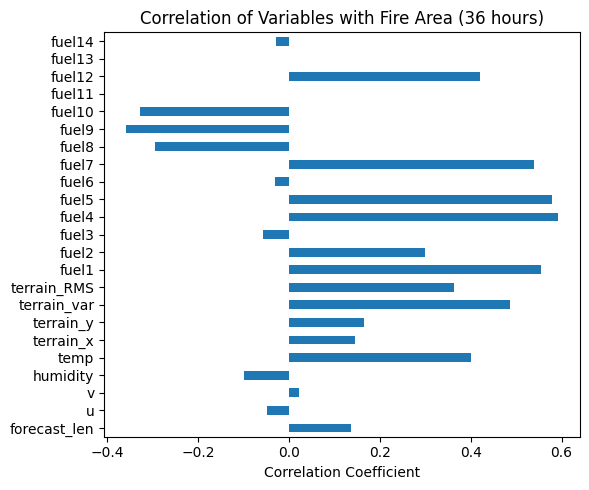

In [14]:
# Get correlations with fire area (assuming fire area is first column)
fire_area_corr = df.corr().iloc[0, 1:]  # First row, excluding self-correlation

plt.figure(figsize=(6, 5))
fire_area_corr.plot(kind='barh')
plt.title("Correlation of Variables with Fire Area (36 hours)")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

# color positive and negative corrleations

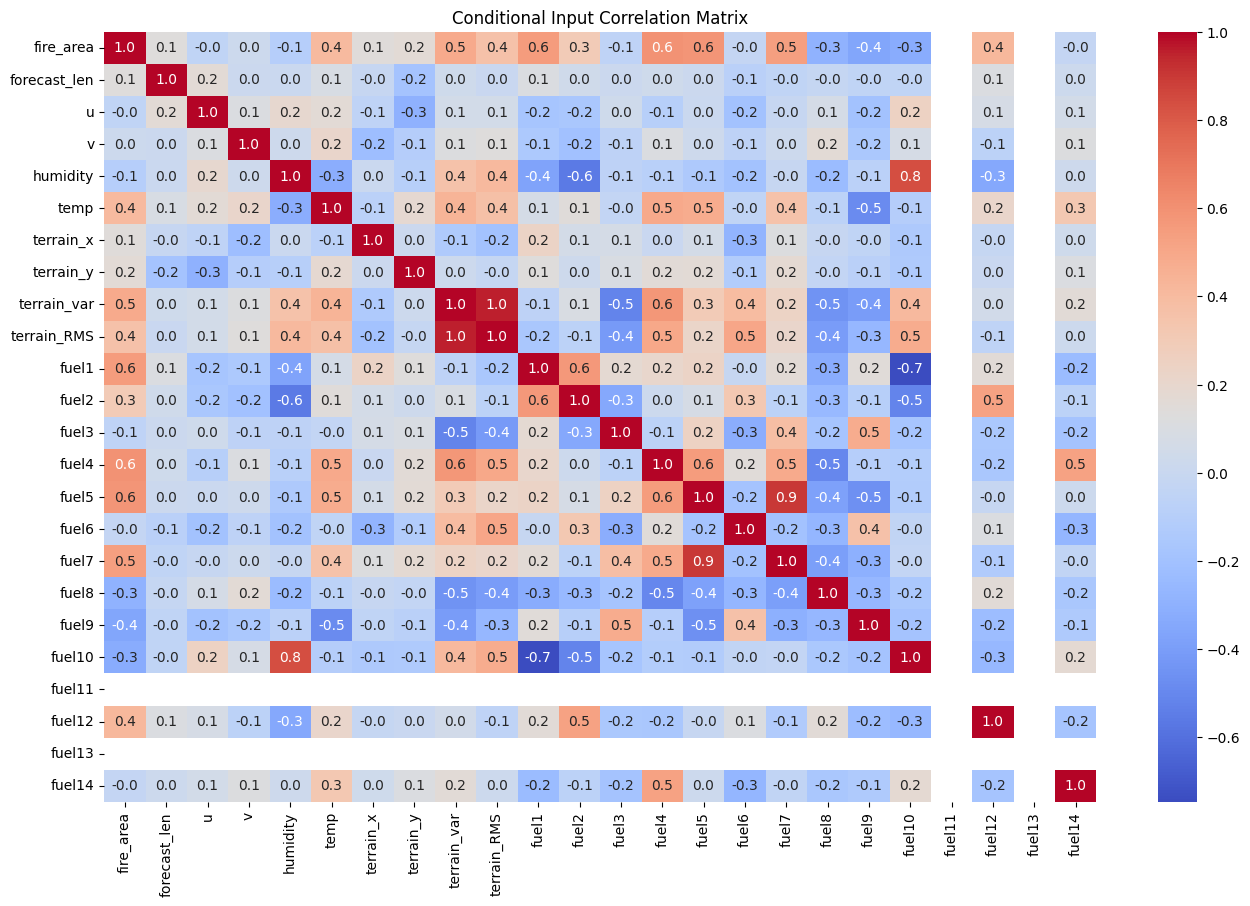

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, fmt="0.1f", cmap="coolwarm")
plt.title("Conditional Input Correlation Matrix")
plt.show()

In [16]:
u,v = df['u'],df['v']
u = (u*28)-14 # meters per second
v = (v*28)-14
wind_speed = np.sqrt(u**2 + v**2)
print(wind_speed.shape)

fuel2 = df['fuel2']
fuel12 = df['fuel12']
humidity = df['humidity']

filtered_real_fire_area = filtered_training_data[:,0]
print(filtered_real_fire_area.shape)

filtered_pred_fire_area = pred[indices]
print(filtered_pred_fire_area.shape)

(123,)
(123,)
(123, 1)


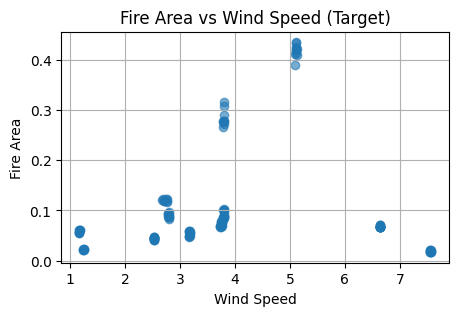

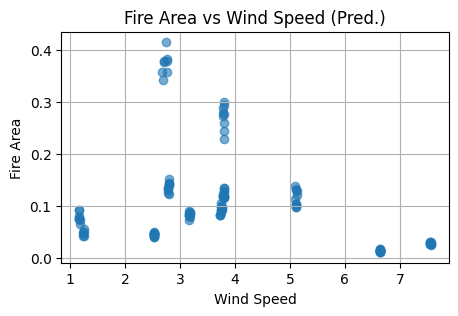

In [17]:
plt.figure(figsize=(5, 3))
plt.scatter(wind_speed, filtered_real_fire_area, alpha=0.6)
plt.xlabel('Wind Speed')
plt.ylabel('Fire Area')
plt.title('Fire Area vs Wind Speed (Target)')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
plt.scatter(wind_speed, filtered_pred_fire_area, alpha=0.6)
plt.xlabel('Wind Speed')
plt.ylabel('Fire Area')
plt.title('Fire Area vs Wind Speed (Pred.)')
plt.grid(True)
plt.show()

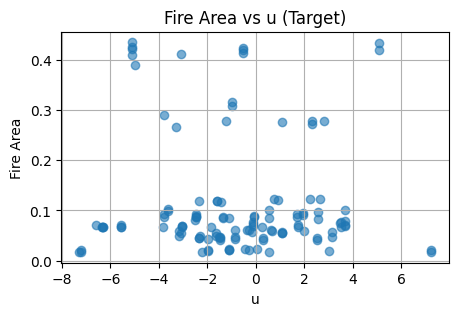

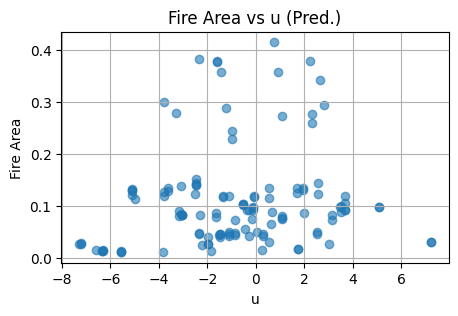

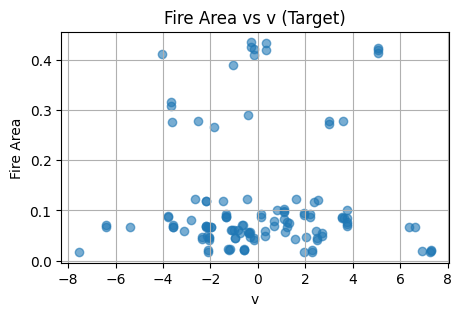

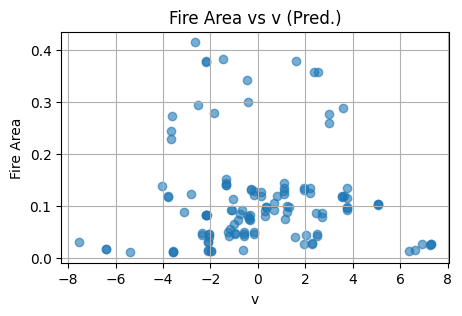

In [18]:
plt.figure(figsize=(5, 3))
plt.scatter(u, filtered_real_fire_area, alpha=0.6)
plt.xlabel('u')
plt.ylabel('Fire Area')
plt.title('Fire Area vs u (Target)')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
plt.scatter(u, filtered_pred_fire_area, alpha=0.6)
plt.xlabel('u')
plt.ylabel('Fire Area')
plt.title('Fire Area vs u (Pred.)')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
plt.scatter(v, filtered_real_fire_area, alpha=0.6)
plt.xlabel('v')
plt.ylabel('Fire Area')
plt.title('Fire Area vs v (Target)')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
plt.scatter(v, filtered_pred_fire_area, alpha=0.6)
plt.xlabel('v')
plt.ylabel('Fire Area')
plt.title('Fire Area vs v (Pred.)')
plt.grid(True)
plt.show()

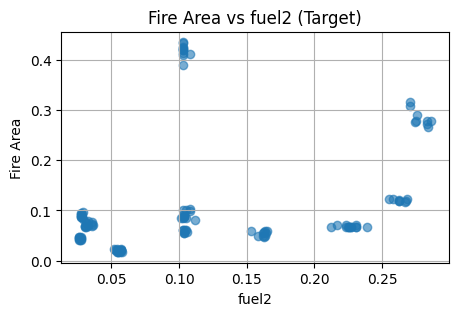

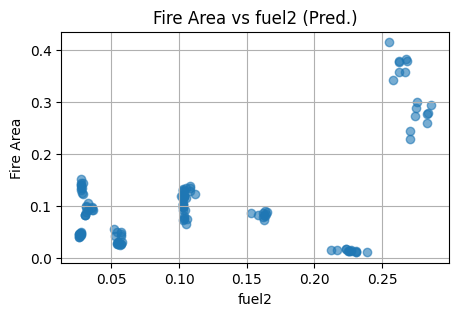

In [19]:
plt.figure(figsize=(5, 3))
plt.scatter(fuel2, filtered_real_fire_area, alpha=0.6)
plt.xlabel('fuel2')
plt.ylabel('Fire Area')
plt.title('Fire Area vs fuel2 (Target)')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
plt.scatter(fuel2, filtered_pred_fire_area, alpha=0.6)
plt.xlabel('fuel2')
plt.ylabel('Fire Area')
plt.title('Fire Area vs fuel2 (Pred.)')
plt.grid(True)
plt.show()

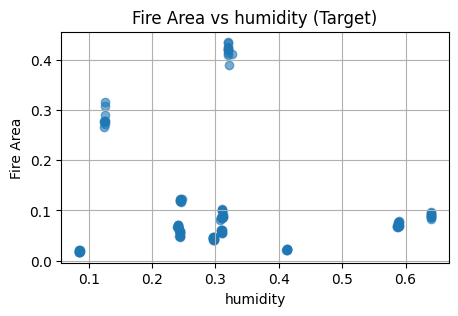

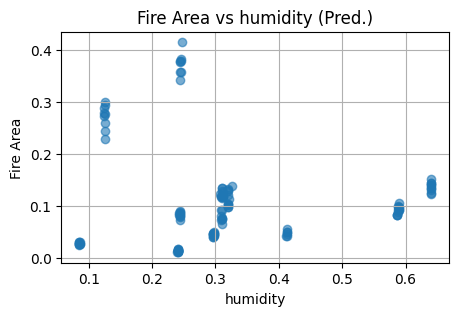

In [20]:
plt.figure(figsize=(5, 3))
plt.scatter(humidity, filtered_real_fire_area, alpha=0.6)
plt.xlabel('humidity')
plt.ylabel('Fire Area')
plt.title('Fire Area vs humidity (Target)')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 3))
plt.scatter(humidity, filtered_pred_fire_area, alpha=0.6)
plt.xlabel('humidity')
plt.ylabel('Fire Area')
plt.title('Fire Area vs humidity (Pred.)')
plt.grid(True)
plt.show()